# Search Algorithms

By **Christa Baca (@cjb-dev)**





## Description

The goal of this program is to use csv data for Texas cities to perform tasks using various algorithms (uninformed and informed).

**Uninformed searches: BFS, DFS, UCS**

**Informed searches: GBFS, A***

## Part 1: Reading Data Files & Creating a 2D Graph
In the following code blocks, connect to the Google Drive folder to load and handle data files provided: **cities.csv** and **distances.csv**. Using these files, create a 2D graph with nodes that represent each city, and edges that represent the lines connecting each city (where a relationship is found). This graph will be used for the next section to perform uninformed & informed search algorithms.

Here is a description of the files mentioned:

*   **cities.csv** - This file contains a list of coordinates for selected cities in Texas, in the following format:
```
San Antonio,29.4685,-98.5254
```
The above line means that San Antonio is located at the latitude and longitude of 29.4685 N and 98.5254 W respectively. Note that the '-ve' sign denotes 'S' for latitude and 'W' for longitude. While performing calculations you will need to ignore the sign.

*   **distances.csv** - This file contains distance values between two cities of Texas, if a path exists, in the following format:
```
San Antonio,New Braunfels,30.80876734
```
The above line means that there should be an edge between *San Antonio* and *New Braunfels*, and the weight on that edge, i.e. the distance, is *30.80876734*.





In [ ]:
# Imported libraries
import pandas as pd
import matplotlib.pyplot as plt
from queue import PriorityQueue
import geopy.distance
import numpy as np


In [ ]:
# Path to retrieve data files in Drive
basePath = "/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Data/"
map = "texas-map.png"

In [ ]:
# Connect to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the graph data from the files. Created headers (titles for each column) to help work with data.
cities_df = pd.read_csv(basePath+"cities.csv", names=['Cities', 'Latitude', 'Longitude'])
distances_df = pd.read_csv(basePath+"distances.csv", names=['City_1', 'City_2', 'Distances'])

# Initialize graph
graph = {}

# Iterates through rows in cities data frame
for index1, row1 in cities_df.iterrows():
    # Initialize variables
    city_1 = row1['Cities']
    x = row1['Latitude']
    y = row1['Longitude']

    # Generate node
    node = (city_1, x, y)

    # Reset edges list to empty after second loop iteration
    edges = []

    # Add initial nodes as keys to the graph, with edges calculated below
    graph[node] = edges

    # Nested loop to iterate through rows in both data frames
    for index2, row2 in distances_df.iterrows():

        # If the node is equal to a city in the first column in distances, add it as a new edge
        if node[0] == row2['City_1']:

            # Iterate through cities data frame again to help find matching city names
            for index3, row3 in cities_df.iterrows():

                # Finds matching name again in cities data frame
                if row2['City_2'] == row3['Cities']:

                    # Retrieves destination coordinates
                    destination_coords = (row3['Latitude'], row3['Longitude'])

                    # Append to edges for more city connections associated with node
                    edges.append((row2['City_2'], row3['Latitude'], row3['Longitude'], row2['Distances']))

                    # Add to edges node key
                    graph[node] = edges

        # Otherwise, if the node is equal to a city in the second column in distances, add it as a new edge
        elif node[0] == row2['City_2']:

            # Iterate through cities data frame again to help find matching city names
            for index3, row3 in cities_df.iterrows():

                # Finds matching name again in cities data frame
                if row2['City_1'] == row3['Cities']:

                    # Retrieves destination coordinates
                    destination_coords = (row3['Latitude'], row3['Longitude'])

                    # Append to edges for more city connections associated with node
                    edges.append((row2['City_1'], row3['Latitude'], row3['Longitude'], row2['Distances']))

                    # Add to edges node key
                    graph[node] = edges

# Indicates graph printed below to showcase all city coordinates and connections
print("Graph created for 39 Texas cities: ")

# Iterates through graph's key/value pairs and prints all graph information
key_index = 1
for key, value in graph.items():
    print(key_index, ' ', key, ' : ', value)
    key_index += 1

Graph created for 39 Texas cities: 
1   ('Abilene', 32.4543, -99.7384)  :  [('San Angelo', 31.4426, -100.4501, 95.26906977)]
2   ('Alice', 27.7556, -98.0653)  :  [('Laredo', 27.5617, -99.4874, 98.54431104), ('Three Rivers', 28.4668, -98.1784, 51.26861733), ('McAllen', 26.2273, -98.2471, 113.6156404)]
3   ('Amarillo', 35.1989, -101.831)  :  [('Lubbock', 33.5642, -101.8871, 122.9827931), ('Dalhart', 36.0579, -102.5123, 85.07238807)]
4   ('Austin', 30.3006, -97.7517)  :  [('San Marcos', 29.8736, -97.938, 30.71742595), ('Round Rock', 30.5254, -97.6659, 18.46400955), ('College Station', 30.5852, -96.296, 106.7588224), ('Houston', 29.7869, -95.3905, 165.9076541)]
5   ('Beaumont', 30.085, -94.1451)  :  [('Houston', 29.7869, -95.3905, 99.57951346)]
6   ('Brownsville', 25.998, -97.4565)  :  [('McAllen', 26.2273, -98.2471, 59.20599771)]
7   ('College Station', 30.5852, -96.296)  :  [('Austin', 30.3006, -97.7517, 106.7588224), ('Waco', 31.5597, -97.1882, 97.82787143), ('Houston', 29.7869, -95.390

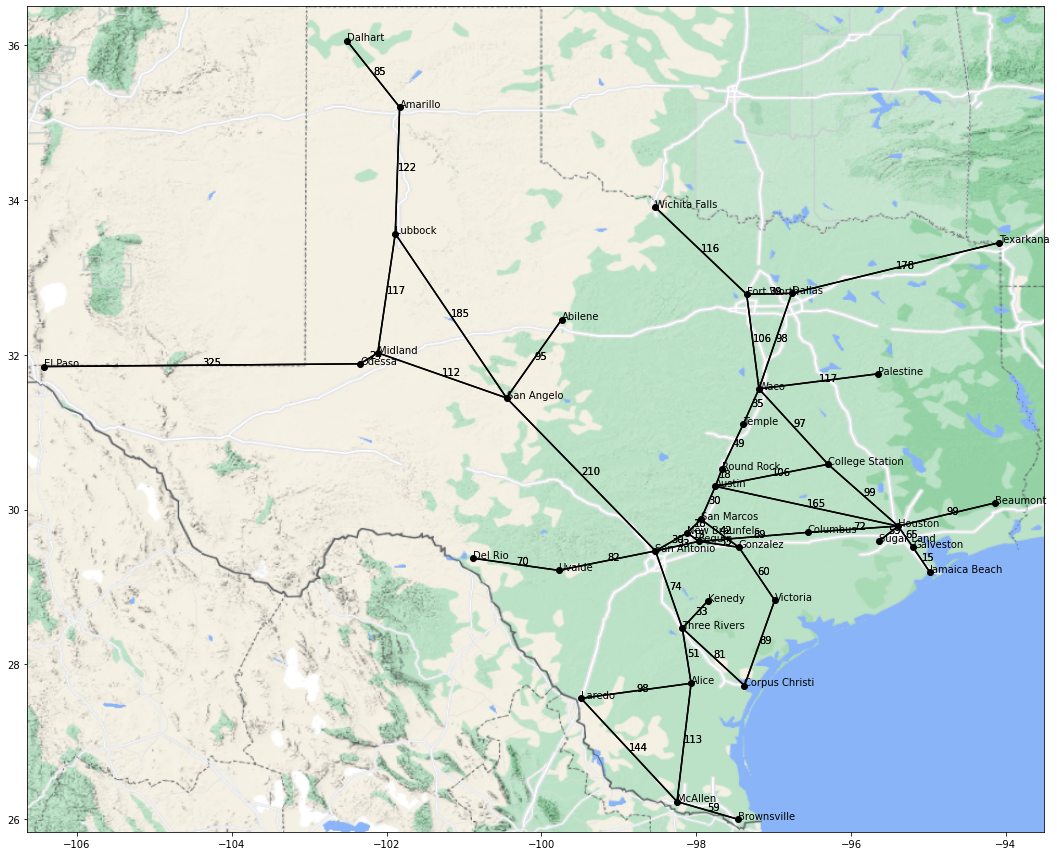

In [ ]:
# Display a 2D graph of the given data.
# Loads in image and configures map size for readability
image = plt.imread(basePath + map)
figure, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [17,12]
plt.rcParams["figure.autolayout"] = True

# Displays image of Texas map below generated graph (*coordinates taken from Wikipedia for Texas's most extreme points)
image_plot=ax.imshow(image, extent=[-106.645653,-93.508039,25.837108,36.500703])

# Creates lists to hold x and y coordinates
x_coordinates = []
y_coordinates = []

# Iterates through all key/value pairs in graph dictionary
for key, value in graph.items():

  # Creates index variable
  i = 0

  # Displays city coordinate points on the map
  ax.scatter(x=key[2], y=key[1], c='black')

  # Displays city names next to coordinates
  ax.annotate(key[0], (key[2], key[1]))

  # Updates x and y coordinates using key
  x_coordinates = key[2]
  y_coordinates = key[1]

  # Iterates through each value in dictionary graph
  for vals in value:

    # Creates a new set of coordinate lists using the value
    x_coords2 = value[i][2]
    y_coords2 = value[i][1]

    # Creates pairs of coordinates from both key and value
    x_vals = [x_coordinates, x_coords2]
    y_vals = [y_coordinates, y_coords2]

    # Draws lines connecting cities using previous x and y value lists
    plt.plot(x_vals, y_vals, color='black')

    # Finds the midpoint between each city with connections
    mid1 = (key[1] + value[i][1])/2
    mid2 = (key[2] + value[i][2])/2

    # Displays distance between each city
    ax.text(mid2, mid1, int(value[i][3]))

    # Increments loop control variable to go through values
    i += 1

plt.show()

## Part 2: Uninformed Search Agents
In the following code blocks, use the graph created in the previous section and write code for **ANY 2 of 3 uninformed search** agents that we discussed in the class - Breadth First Search (BFS), Depth First Search (DFS), Uniform Cost Search (UCS). The goal is to **start** from **San Antonio** and visit **all **the provided Texas cities. The output for each of the search agent will be to print the following:

*   The total distance travelled
*   The path / sequence of cities expanded

Overlay the selected path-- so that when a node is expanded, draw an edge from the parent city to that city, and label the edge with the number in the order it was expanded-- on the Texas state map.

Path: 
0  :  San Antonio
1  :  San Angelo
2  :  New Braunfels
3  :  Seguin
4  :  Three Rivers
5  :  Uvalde
6  :  Midland
7  :  Lubbock
8  :  Abilene
9  :  San Marcos
10  :  Gonzalez
11  :  Columbus
12  :  Corpus Christi
13  :  Alice
14  :  Kenedy
15  :  Del Rio
16  :  Odessa
17  :  Amarillo
18  :  Austin
19  :  Victoria
20  :  Houston
21  :  Laredo
22  :  McAllen
23  :  El Paso
24  :  Dalhart
25  :  Round Rock
26  :  College Station
27  :  Beaumont
28  :  Galveston
29  :  Sugar Land
30  :  Brownsville
31  :  Temple
32  :  Waco
33  :  Jamaica Beach
34  :  Palestine
35  :  Fort Worth
36  :  Dallas
37  :  Wichita Falls
38  :  Texarkana

BFS total distance:  3325.5703758199998


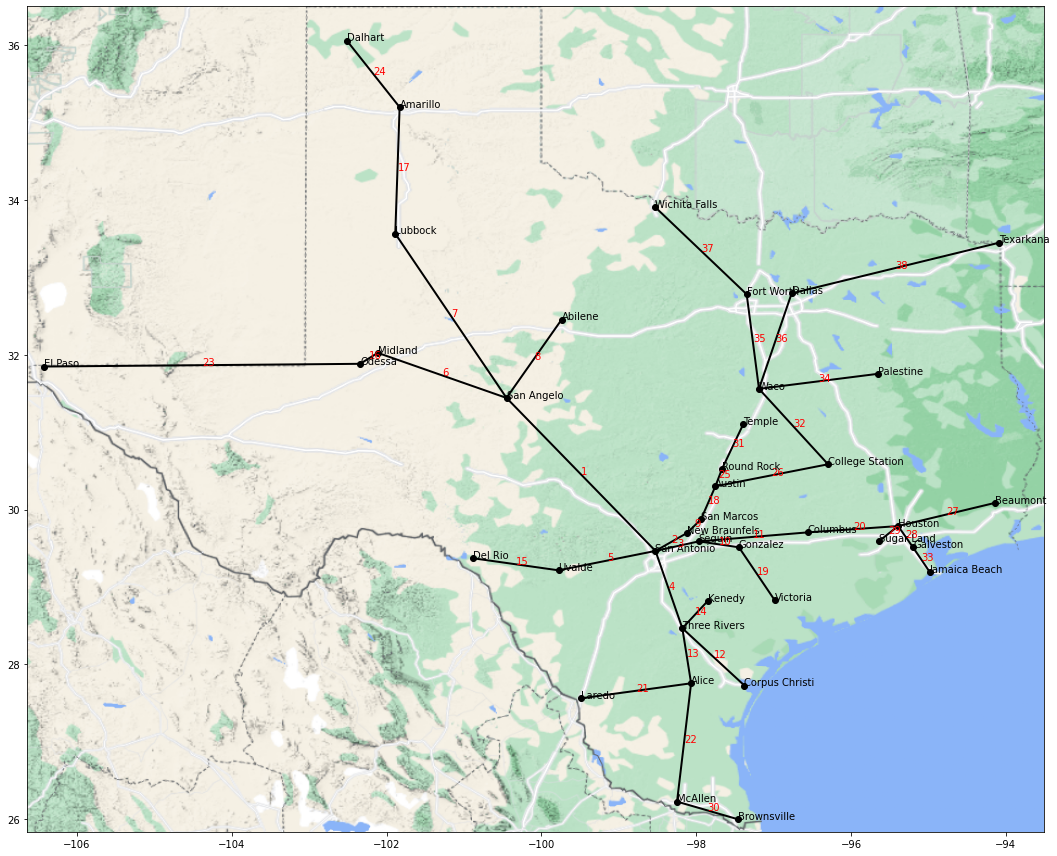

In [ ]:
# ANY 2 of 3 - Breadth First Search

# Loads in image and configures map size for readability
image = plt.imread(basePath + map)
figure, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [17,12]
plt.rcParams["figure.autolayout"] = True

# Displays image of Texas Map below generated graph (***coordinates taken from Wikipedia for Texas's most extreme points)
image_plot=ax.imshow(image, extent=[-106.645653,-93.508039,25.837108,36.500703])

# Initializes variables to be used in search algorithm
visited_nodes = []
queue = []
distance_total = 0

# Prints path indicator (followed by path of cities after function is called)
print("Path: ")

# Breadth First Search Algorithm
def breadth_first_search(visited_nodes, graph, node, distance_total):

  # Initializes variables
  extension_count = 0
  distance = 0.0
  count = 0

  # Adds starting node to visited list and queue
  visited_nodes.append(node)
  queue.append(node)

  # Iterates through queue while it's not empty
  while queue:

    # Pops current node
    current = queue.pop(0)

    # Displays city coordinates
    ax.scatter(x=current[2], y=current[1], c='black')

    # Displays city names
    ax.annotate(current[0], (current[2], current[1]))

    # Prints path, increments path counter
    print(count, " : ", current[0])
    count = count + 1

    # Iterates through edges associated with current node
    for edge in graph[current]:

      # Updates current distance
      distance = edge[3]

      # Reduces edge list to create a key (prevents duplicates)
      edge = edge[0:3]

      # Goes through edge to extend it since it has not been visited
      if edge not in visited_nodes:

        # Coordinate list to plot line from current node to edge
        x_coords = [current[2], edge[2]]
        y_coords = [current[1], edge[1]]
        plt.plot(x_coords, y_coords, color='black', linewidth=2)

        # Adds edge to visited node list
        visited_nodes.append(edge)

        # Adds edge to queue
        queue.append(edge)

        # Increments line extension counter
        extension_count += 1

        # Updates distance total
        distance_total += distance

        # Finds the midpoint between each city with connections
        city1mid = (current[1] + edge[1])/2
        city2mid = (current[2] + edge[2])/2

        # Displays distance between each city
        ax.text(city2mid, city1mid, extension_count, color='red')


  # Prints the total distance travelled using BFS
  print('\nBFS total distance: ', distance_total)

# Calls on Breadth First Search algorithm function
breadth_first_search(visited_nodes, graph, ('San Antonio', 29.4658, -98.5254), distance_total)

plt.show()

Path:
0  :  San Antonio
1  :  San Angelo
2  :  Midland
3  :  Lubbock
4  :  Amarillo
5  :  Dalhart
6  :  Odessa
7  :  El Paso
8  :  Abilene
9  :  New Braunfels
10  :  San Marcos
11  :  Austin
12  :  Round Rock
13  :  Temple
14  :  Waco
15  :  College Station
16  :  Houston
17  :  Beaumont
18  :  Galveston
19  :  Jamaica Beach
20  :  Columbus
21  :  Seguin
22  :  Gonzalez
23  :  Victoria
24  :  Corpus Christi
25  :  Three Rivers
26  :  Alice
27  :  Laredo
28  :  McAllen
29  :  Brownsville
30  :  Kenedy
31  :  Sugar Land
32  :  Palestine
33  :  Fort Worth
34  :  Dallas
35  :  Texarkana
36  :  Wichita Falls
37  :  Uvalde
38  :  Del Rio

DFS total distance:  3237.65459864


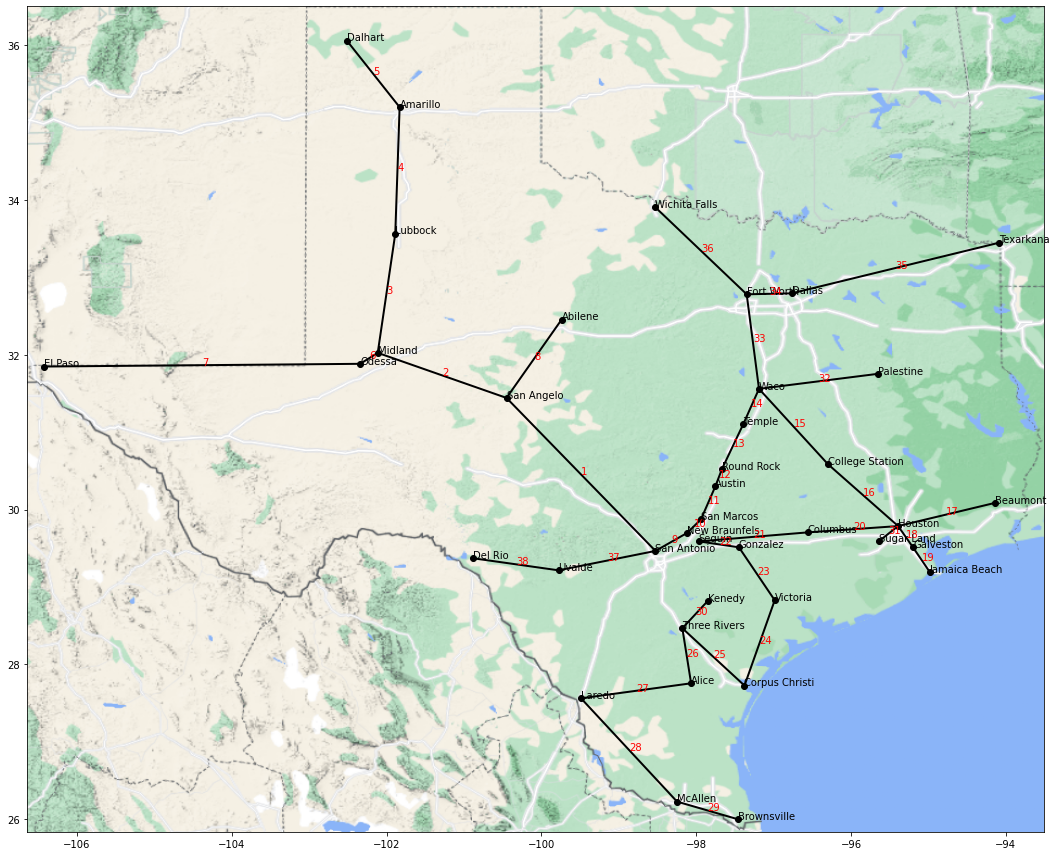

In [ ]:
# ANY 2 of 3 - Depth First Search

# Loads in image and configures map size for readability
image = plt.imread(basePath + map)
figure, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [17,12]
plt.rcParams["figure.autolayout"] = True

# Displays image of Texas Map below generated graph (***coordinates taken from Wikipedia for Texas's most extreme points)
image_plot=ax.imshow(image, extent=[-106.645653,-93.508039,25.837108,36.500703])

# Initializes variables
visited_nodes = []
extension_counter = 0
count = 0
distance = 0.0

# Print path below after function call
print("Path:")

# Depth First Search algorithm
def depth_first_search(visited_nodes, graph, node):

  # Allows for global count and distance variables to be utilized
  global count
  global distance

  # Determines if current node is not in visited, will be used to keep iterating through all nodes
  if node not in visited_nodes:

        # Reduces node size (from [city, latitude, longitude, distance] in edge) to be used as key
        node = node[0:3]

        # Prints path of cities
        print(count, ' : ', node[0])

        # Adds current node to visited list
        visited_nodes.append(node)

        # Plots city coordinates
        ax.scatter(x=node[2], y=node[1], c='black')

        # Displays city names
        ax.annotate(node[0], (node[2], node[1]))

        # Iterates through edges associated with current node
        for edge in graph[node]:

            # Holds temporary distance variable to calculate total
            t_distance = edge[3]

            #Reduces node size (from [city, latitude, longitude, distance] in edge) to be used as key
            edge = edge[0:3]

            # Reads in more information from edge node if not in visited list
            if edge not in visited_nodes:

              # Holds temporary distance variable to calculate total
              distance += t_distance

              # Creates x and y coordinate lists
              x_coords = [node[2], edge[2]]
              y_coords = [node[1], edge[1]]

              # Plots lines between current node and edge
              plt.plot(x_coords, y_coords, color='black', linewidth=2)

              # Calculates midpoint of each line
              city1mid = (node[1] + edge[1])/2
              city2mid = (node[2] + edge[2])/2

              # Increments counter
              count += 1

              # Displays distance between each city after casting value to integer
              ax.text(city2mid, city1mid, count, color='red')

            # Recurses through function until all nodes have been visited
            depth_first_search(visited_nodes, graph, edge)

# Calls on Depth First Search algorithm function
depth_first_search(visited_nodes, graph, ('San Antonio', 29.4658, -98.5254))

# Prints total distance
print('\nDFS total distance: ', distance)

plt.show()

In [ ]:
# ANY 2 of 3 - Uniform Cost Search

## Informed Search Agents
In the following code blocks, use the graph created in the previous section and write code for **2 informed search** agents that we discussed in the class - Greedy Best First Search (GBFS) and A\* Search. The goal is to start from **San Antonio** and reach **College Station** in the fastest way possible. The output for each of the search agent will be to print the following:

*   The total distance travelled
*   The path / sequence of cities expanded

Overlay the selected path-- so that when a node is expanded, draw an edge from the parent city to that city and label the edge with the number in the order it was expanded-- on the Texas state map.

Path: 
0 : San Antonio
1 : Seguin
2 : Columbus
3 : Houston
4 : College Station

GBFS total distance:  295.32038401


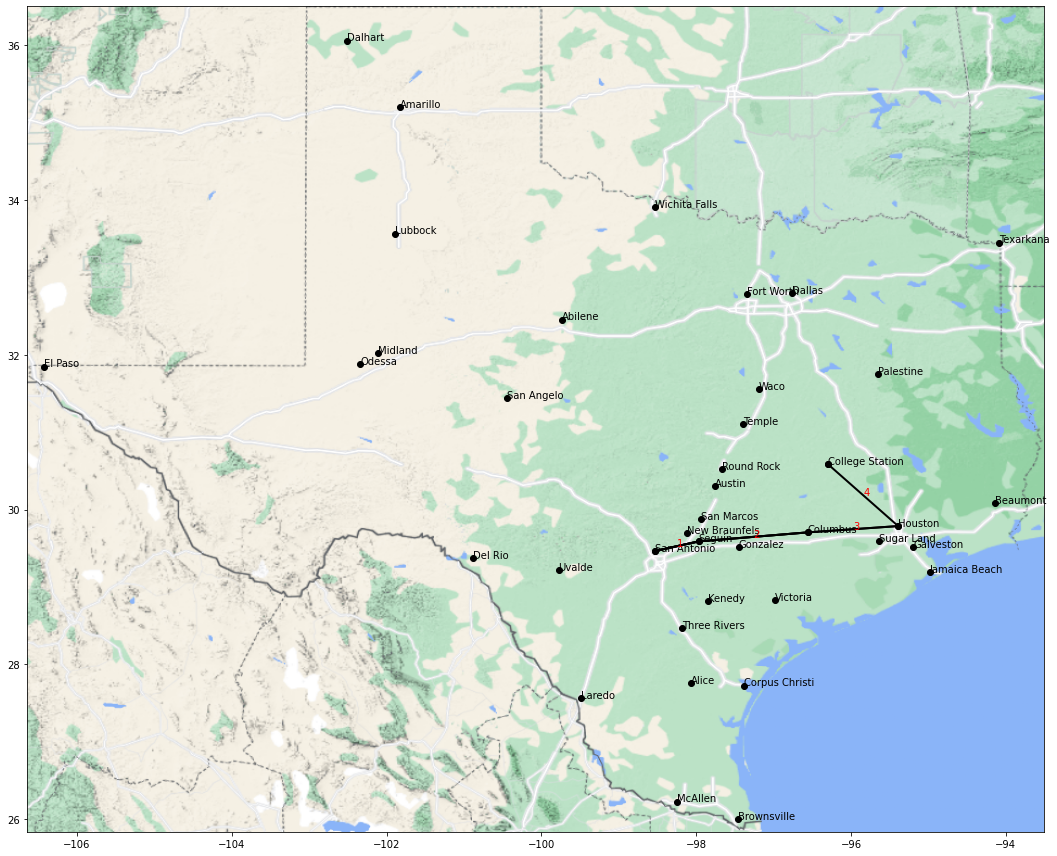

In [ ]:
# Greedy Best First Search

# Imports Great Circle to help calculate for heuristics with acknowledgement of Earth's curve
from geopy.distance import great_circle as GRC

# Loads in image and configures map size for readability
image = plt.imread(basePath + map)
figure, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [17,12]
plt.rcParams["figure.autolayout"] = True

# Displays image of Texas Map below generated graph (***coordinates taken from Wikipedia for Texas's most extreme points)
image_plot=ax.imshow(image, extent=[-106.645653,-93.508039,25.837108,36.500703])

# Iterates through key/value pairs in graph to print all cities
for key, value in graph.items():

  # Displays city coordinate points
  ax.scatter(x=key[2], y=key[1], c='black')

  # Displays city names
  ax.annotate(key[0], (key[2], key[1]))

# Greedy Best First Search Algorithm function
def greedy_best_first_search(start, goal, graph):

    # Initializes visited list and priority queue
    visited = []
    pq = PriorityQueue()

    # Adds starting node to queue and to visited list
    visited.append(start)
    pq.put((0, start))

    # Variables to help keep track of heuristics
    heuristics = []
    h_node = []

    # Variables to help with printing information
    distance = 0.0
    path = []
    x_coords = []
    y_coords = []
    i = 0

    # Continues while priority queue is not empty
    while pq.empty() == False:

        # Retrieves item in queue with lowest heuristic value (highest priority)
        current = pq.get()[1]

        # Appends current node to path list (to print paths later)
        path.append(current)

        # Calculates straight line distance (not heuristics) if the node is not the start node
        if (len(current) > 3):
          distance += current[3]

        # Reduces current node size so it can be used as a key
        current = current[0:3]

        # Displays the coordinates of cities using heuristics
        ax.scatter(x=current[2], y=current[1], c='black')

        # Prints path
        print(i, ':', current[0])
        i = i + 1

        # Stops when current node is the same as goal (College Station)
        if current == goal:
            break

        # Checks edges associated with current node
        for edge in graph[current]:

            # Goes through edges that have not been visited
            if edge not in visited:

              # Uses coordinates to calculate heuristics (haversine distance between edge and goal)
              coords1 = [edge[1], edge[2]]
              coords2 = [goal[1], goal[2]]

              # Uses GRC function along with above coordinates to find haversine distance
              heuristics = GRC(coords1, coords2).miles

              # Add edge to visited list
              visited.append(edge)

              # Generate node with heuristics first, followed by edge, to be used as priority value in pq
              h_node = [heuristics, (edge)]

              # Insirt h_node into pq
              pq.put(h_node)

    # For loop to print city lines
    count = 0
    for city in path:

      # Appends x and y coordinates of all cities in path
      x_coords.append(city[2])
      y_coords.append(city[1])

      # Plots connections to each city
      plt.plot(x_coords, y_coords, color='black', linewidth=2)

    # For loop to print each line extension
    for i in range(len(path)-1):

      # Calculates midpoint
      city1mid = (path[i][1] + path[i+1][1])/2
      city2mid = (path[i][2] + path[i+1][2])/2

      # Increases extension counter
      count += 1

      # Prints counter in between lines
      ax.text(city2mid, city1mid, count, color='red')

    # Print total distance travelled usingg GBFS
    print('\nGBFS total distance: ', distance)

# Print indicator for path after function is called
print("Path: ")

# Calls on Greedy Best First Search algorithm function
greedy_best_first_search(('San Antonio', 29.4658, -98.5254), ('College Station', 30.5852, -96.296), graph)

plt.show()

In [ ]:
# function to display cities on map
def display_cities(graph):
  # iterates through key/value pairs (city nodes) in graph
  for key, value in graph.items():
      # displays city point at coordinates
      ax.scatter(x=key[2], y=key[1], c='black')
      # displays name of city
      ax.annotate(key[0], (key[2], key[1]))


Path: 
0 : San Antonio
1 : Gonzalez
2 : New Braunfels
3 : Columbus
4 : San Antonio

A* total distance: 1490.2956720599998


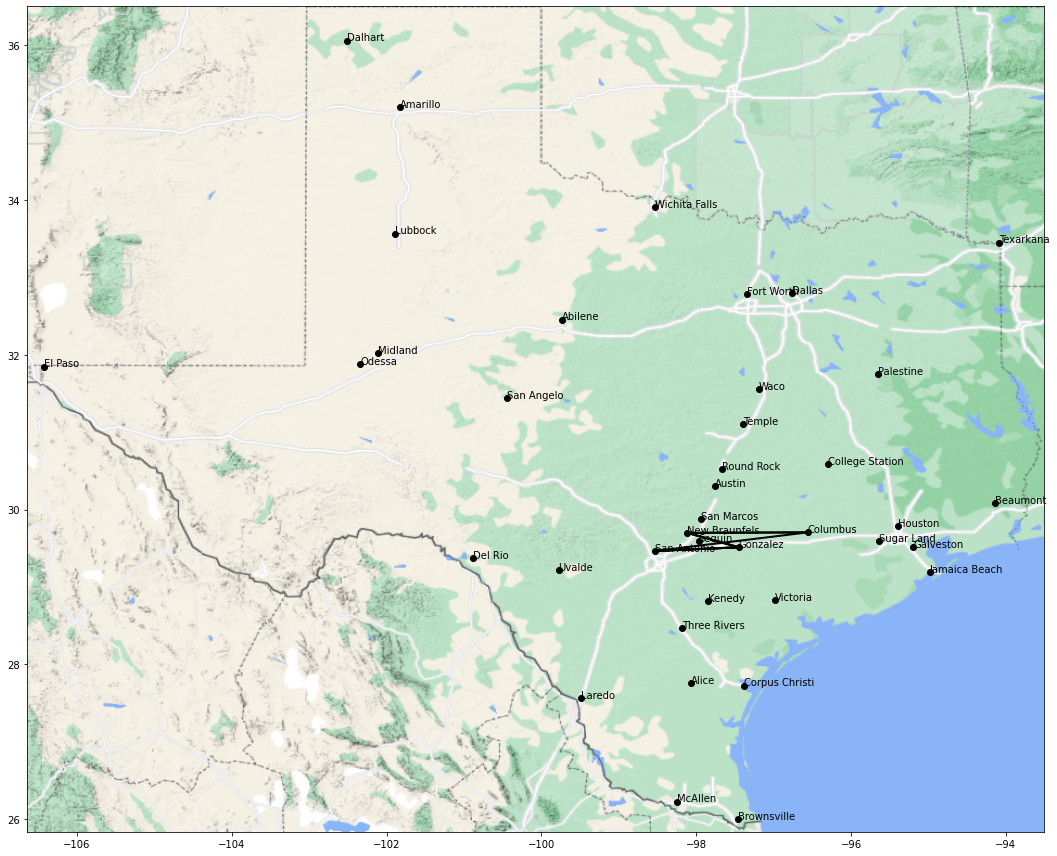

In [ ]:
# A* Search

# Loads in image and configures map size for readability
image = plt.imread(basePath + map)
figure, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [17,12]
plt.rcParams["figure.autolayout"] = True

# Displays image of Texas Map below generated graph (*coordinates taken from Wikipedia for Texas's most extreme points)
image_plot=ax.imshow(image, extent=[-106.645653,-93.508039,25.837108,36.500703])


display_cities(graph)



# Function to calculate heuristic values
def heuristic(edge, goal):

    # Create lists of coordinates to use in calculation
    coords1 = [edge[1], edge[2]]
    coords2 = [goal[1], goal[2]]

    # Calculate harvesine distance
    heuristics = GRC(coords1, coords2).miles

    return heuristics

# Print path below
print('Path: ')

# Function for A* search
def a_star_search(start, goal, graph):

  # Initialize variables
  path = []
  closed = []
  open = [start]
  x_coords = []
  y_coords = []
  distance = 0.0

  # Create priority queue and insert start node
  f_nodes = PriorityQueue()
  f_nodes.put((0, start))

  # Create lists for edges and current node being looked at
  edges = []
  current = []

  # Continues while open is not empty
  while open:
      # Retrieves current node in priority queue with the lowest f value
      current = f_nodes.get()[1]

      # Removes current node from open list
      open.remove(current)

      # Adds current node to closed list
      closed.append(current)

      # Reduces current node size to be used as a key
      current = current[0:3]

      # Stops if goal is reached
      if current == goal:
         break

      # Generates list of edge nodes associated with current node
      edges = graph[current]

      # Iterates through each edge in edges list
      for edge in edges:

          # Continues iteration if edge is found in closed list
          if edge in closed:
            continue

          # Calculates heuristics for current node and adds to edge_g
          g = heuristic(start, current)
          edge_g = edge[3] + g

          # Calculate distance
          distance += edge[3]

          # Includes distance from edge to goal
          edge_h = heuristic(goal, edge)

          # Includes total traversal distance
          edge_f = edge_g + edge_h

          # Checks if edge is in the open list
          if edge in open:

              # Calculates open list's node's g to use for comparison
              open_coords = open[open.index(edge)]
              open_g = heuristic(open_coords, start)

              # Continues if edge_g is higher than open_g
              if edge_g > open_g:
                path.append(edge)
                continue

          # Adds edge to open list and priority queue
          open.append(edge)
          f_nodes.put([edge_f, edge])

  # For loop to print city lines
  count = 0
  j = 0
  for city in path:
    print(j, ':', city[0])

    # Appends x and y coordinates of all cities in path
    x_coords.append(city[2])
    y_coords.append(city[1])

    # Plots connections to each city
    plt.plot(x_coords, y_coords, color='black', linewidth=2)

    # Increment j
    j = j + 1

  # For loop to print each line extension
  for i in range(len(path)-1):

    # Calculates midpoint
    city1mid = (path[i][1] + path[i+1][1])/2
    city2mid = (path[i][2] + path[i+1][2])/2

    # Increases extension counter
    count += 1


  print('\nA* total distance:', distance)
# Calls A* Search algorithm function
a_star_search(('San Antonio', 29.4658, -98.5254), ('College Station', 30.5852, -96.296), graph)